In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit
0,1.0,05-02-2010,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83
1,1.0,12-02-2010,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06
2,NaN,19-02-2010,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39
3,1.0,26-02-2010,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99
4,1.0,05-03-2010,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
df['date_year'] = df['Date'].dt.year
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year
1749,13.0,2010-09-24,1705655.09,0.0,68.22,2.872,126.190033,8.0,81580.54608,2010
1008,8.0,2010-03-26,772539.12,0.0,46.51,2.732,214.370357,6.0,152211.77000,2010
5994,42.0,2012-08-10,576620.31,0.0,90.78,3.811,130.756161,7.0,132077.70900,2012
188,2.0,2010-12-17,2609166.75,0.0,NaN,2.869,211.064546,8.0,181391.67840,2010
2378,17.0,2011-10-28,936508.43,0.0,41.89,3.567,129.793677,7.0,183965.65830,2011


In [5]:
df['date_month'] = df['Date'].dt.month
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month
2257,16.0,2012-03-30,485095.41,0.0,48.29,3.750,197.413326,6.0,68719.18949,2012,3
5678,40.0,2012-01-13,780607.52,0.0,25.90,3.523,136.753000,4.0,91441.63138,2012,1
1580,12.0,2010-03-26,981615.81,0.0,60.06,3.083,126.605064,14.0,90482.26217,2010,3
1693,12.0,2012-05-25,991514.21,0.0,83.84,4.293,131.028774,12.0,109998.54850,2012,5
4960,35.0,2011-12-23,1550214.02,0.0,41.59,3.389,140.528765,9.0,140251.56890,2011,12


In [6]:
df['date_day'] = df['Date'].dt.day
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day
2030,15.0,2010-08-20,637090.44,0.0,71.10,2.913,132.661613,8.0,99937.59000,2010,8,20
3806,27.0,2011-10-14,1682652.51,0.0,64.78,3.744,140.478419,8.0,83444.60985,2011,10,14
2825,20.0,2012-03-02,2148822.76,0.0,39.98,3.816,213.671813,7.0,79513.16096,2012,3,2
4680,33.0,2012-02-03,256091.32,0.0,59.53,3.543,130.349677,8.0,98397.27172,2012,2,3
6333,45.0,2010-11-19,723987.85,0.0,50.02,3.000,182.898939,9.0,NaN,2010,11,19


In [7]:
df['date_dow'] = df['Date'].dt.dayofweek
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4


In [8]:
df['date_is_weekend'] = np.where(df['date_dow'].isin([5,6]), 1,0)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4,0
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4,0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [10]:
df.isnull().mean()*100

Store              0.714841
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       1.989122
Temperature        2.175602
Fuel_Price         0.932401
CPI                0.543901
Unemployment       3.387723
Profit             3.139083
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

In [11]:
# We decide that we remove data which is missing by less than 1%.

In [12]:
l = [col for col in df.columns if df[col].isnull().mean()<0.01 and df[col].isnull().mean()>0]
l

['Store', 'Fuel_Price', 'CPI']

In [13]:
# We do not do Complete Case Analysis on Fuel Price because a set of values or missing
l = l[2]

In [14]:
l

'CPI'

In [15]:
df.dropna(subset = l, inplace=True)

In [16]:
import pandas as pd


# Define arbitrary values for imputation
arbitrary_values = {'Store':-1}  # Define arbitrary values for each column

# Impute missing values with arbitrary values
for column, value in arbitrary_values.items():
    df[column].fillna(value, inplace=True)

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4,0
2,-1.0,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,45.0,2012-09-21,723086.20,0.0,65.32,NaN,191.856704,9.0,NaN,2012,9,21,4,0
6431,45.0,2012-10-05,733455.07,0.0,64.89,NaN,192.170412,9.0,NaN,2012,10,5,4,0
6432,45.0,2012-10-12,734464.36,0.0,54.47,NaN,192.327265,9.0,NaN,2012,10,12,4,0
6433,45.0,2012-10-19,718125.53,0.0,56.47,NaN,192.330854,9.0,NaN,2012,10,19,4,0


In [17]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [18]:
random_sampling_imputation('Holiday_Flag')

In [19]:
df.isna().mean()*100

Store              0.000000
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       0.000000
Temperature        2.109375
Fuel_Price         0.718750
CPI                0.000000
Unemployment       3.359375
Profit             3.000000
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

Text(0.5, 1.0, 'Temperature')

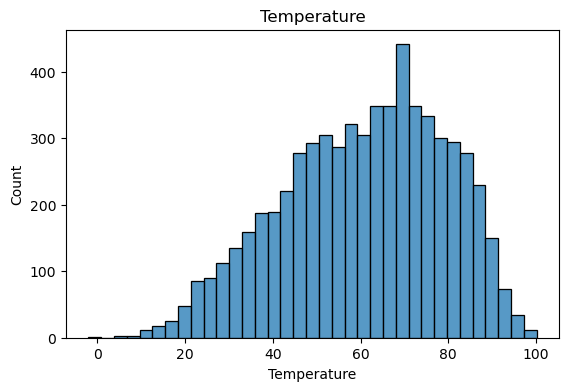

In [20]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Temperature'])
plt.title('Temperature')

In [21]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Initialize SimpleImputer with median strategy
si = SimpleImputer(strategy='median')

# Impute missing values in 'Temperature' column
df['Temperature'] = si.fit_transform(df[['Temperature']])

# Display the DataFrame after imputation
print(df)


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31         NaN   
1       1.0 2010-02-12    1641957.44           1.0        38.51         NaN   
2      -1.0 2010-02-19    1611968.17           0.0        39.93         NaN   
3       1.0 2010-02-26    1409727.59           0.0        46.63         NaN   
4       1.0 2010-03-05    1554806.68           0.0        46.50         NaN   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32         NaN   
6431   45.0 2012-10-05     733455.07           0.0        64.89         NaN   
6432   45.0 2012-10-12     734464.36           0.0        54.47         NaN   
6433   45.0 2012-10-19     718125.53           0.0        56.47         NaN   
6434   45.0 2012-10-26     760281.43           0.0        58.85         NaN   

             CPI  Unemployment     Profit  date_yea

In [22]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price          46
CPI                  0
Unemployment       215
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [23]:
df["Fuel_Price"].fillna(df["Fuel_Price"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
2      -1.0 2010-02-19    1611968.17           0.0        39.93       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [24]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment       215
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Initialize SimpleImputer with median strategy
si = SimpleImputer(strategy='most_frequent')

# Impute missing values in 'Temperature' column
df['Unemployment'] = si.fit_transform(df[['Unemployment']])

# Display the DataFrame after imputation
print(df)


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
2      -1.0 2010-02-19    1611968.17           0.0        39.93       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [26]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [27]:
df["Profit"].fillna(df["Profit"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
2      -1.0 2010-02-19    1611968.17           0.0        39.93       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [28]:
df.isna().sum()

Store              0
Date               0
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Profit             0
date_year          0
date_month         0
date_day           0
date_dow           0
date_is_weekend    0
dtype: int64

In [29]:
df = df.drop('Date', axis=1)

In [30]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,1643690.90,0.0,42.31,4.468,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,1641957.44,1.0,38.51,4.468,211.242170,8.0,191792.06,2010,2,12,4,0
2,-1.0,1611968.17,0.0,39.93,4.468,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,1409727.59,0.0,46.63,4.468,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,1554806.68,0.0,46.50,4.468,211.350143,8.0,166187.94,2010,3,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,45.0,723086.20,0.0,65.32,4.468,191.856704,9.0,476485.43,2012,9,21,4,0
6431,45.0,733455.07,0.0,64.89,4.468,192.170412,9.0,476485.43,2012,10,5,4,0
6432,45.0,734464.36,0.0,54.47,4.468,192.327265,9.0,476485.43,2012,10,12,4,0
6433,45.0,718125.53,0.0,56.47,4.468,192.330854,9.0,476485.43,2012,10,19,4,0


In [31]:
for column in df:
    mean = df[column].mean()
    max = df[column].max()
    min = df[column].min()
    df[column] = (df[column] - mean)/(max - mean)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,-0.981368,0.214454,-0.075088,-0.470471,1.0,0.709450,-0.000625,0.169691,-0.929454,-0.801853,-0.696903,NaN,NaN
1,-0.981368,0.213827,1.000000,-0.567096,1.0,0.712076,-0.000625,0.168318,-0.929454,-0.801853,-0.240044,NaN,NaN
2,-1.071431,0.202996,-0.075088,-0.530989,1.0,0.712922,-0.000625,0.166152,-0.929454,-0.801853,0.216814,NaN,NaN
3,-0.981368,0.129953,-0.075088,-0.360625,1.0,0.713471,-0.000625,0.142348,-0.929454,-0.801853,0.673673,NaN,NaN
4,-0.981368,0.182351,-0.075088,-0.363930,1.0,0.714020,-0.000625,0.093520,-0.929454,-0.621667,-0.696903,NaN,NaN
